In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
df = pd.read_csv(r"../app/entites/fakenews_dataset/train.tsv", sep="	")

In [4]:
df.head() #пример данных

,title,is_fake
0,Москвичу Владимиру Клутину пришёл счёт за вмеш...,1
1,Агент Кокорина назвал езду по встречке житейск...,0
2,Госдума рассмотрит возможность введения секрет...,1
3,ФАС заблокировала поставку скоростных трамваев...,0
4,Против Навального завели дело о недоносительст...,1


In [5]:
df.info() #информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5758 entries, 0 to 5757
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    5758 non-null   object
 1   is_fake  5758 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.1+ KB


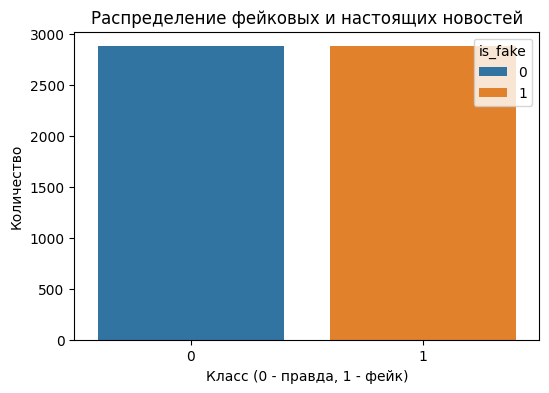

<Figure size 640x480 with 0 Axes>

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['is_fake'], hue=df['is_fake'])
plt.title("Распределение фейковых и настоящих новостей")
plt.xlabel("Класс (0 - правда, 1 - фейк)")
plt.ylabel("Количество")
plt.show()
plt.savefig("Распределение фейковых и настоящих новостей.png")

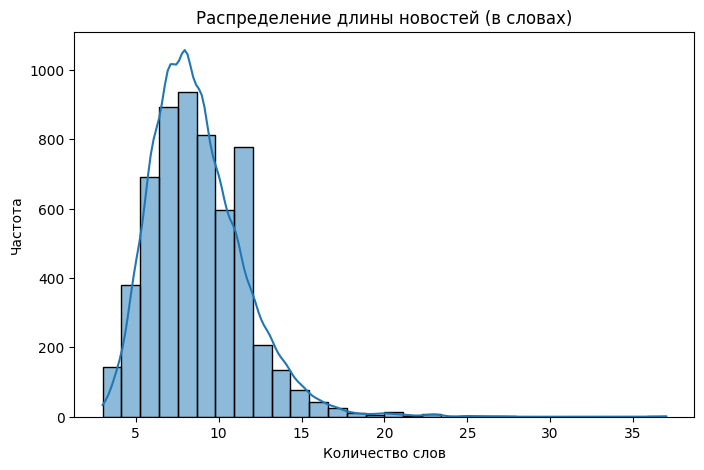

<Figure size 640x480 with 0 Axes>

In [15]:
df["text_length"] = df["title"].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8,5))
sns.histplot(df["text_length"], bins=30, kde=True) 
plt.title("Распределение длины новостей (в словах)")
plt.xlabel("Количество слов")
plt.ylabel("Частота")
plt.show()
plt.savefig("Распределение длины новостей.png")

In [8]:
fake_texts = " ".join(df[df['is_fake'] == 1]["title"].astype(str))
real_texts = " ".join(df[df['is_fake'] == 0]["title"].astype(str))

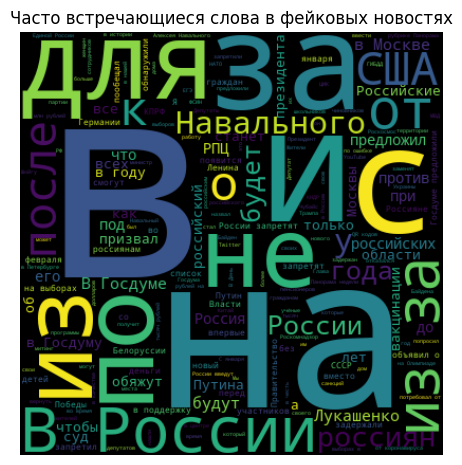

In [16]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
wordcloud_fake = WordCloud(width=400, height=400, background_color="black").generate(fake_texts)
plt.imshow(wordcloud_fake, interpolation="bilinear")
plt.axis("off")
plt.title("Часто встречающиеся слова в фейковых новостях")
plt.savefig("Часто встречающиеся слова в фейковых новостях.png")

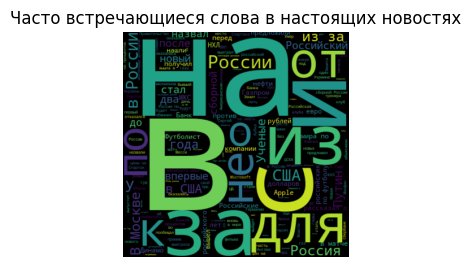

<Figure size 640x480 with 0 Axes>

In [13]:
plt.subplot(1,2,2)
wordcloud_real = WordCloud(width=400, height=400, background_color="black").generate(real_texts)
plt.imshow(wordcloud_real, interpolation="bilinear")
plt.axis("off")
plt.title("Часто встречающиеся слова в настоящих новостях")
plt.show()
plt.savefig("Часто встречающиеся слова в настоящих новостях.png")